# Description of the problem

A 10 years old company TaxAssured wants to increase it's market share in the Czech Republic by the end of the year 2016 by 3%. One of the main strategies of the company is to start selling new products to already existing customers, to further develop previous business relationships. The company decides which customers to address and through what channels in order to keep calculated Return of Investment above 0.5% of every individual offer. The company wants to create a definite list of customers who will be targeted by these campaigns. The main difficulty lies in creating the best list of customers that maximizes marginal profit across all the possible campaigns, products and channels. As the resources of our company are limited, we want to use them in the most efficient way.


## Two main constraints

There are two main constraints which need to be fulfilled:

1. The company has limited budget and cannot exceed it even though the campaign would still be profitable after the threshold of the budget.
2. Company doesn't want to waste it's budget on non-profitable campaings. Shouldn't the campaign be profitable after some threshold, the remaining budget will be allocated to other means of company growth.
3. Minimum and maximum total target group.

## Other minor constraints

Other than the two above mentioned constraints, there are a few minor constraints.

1. Minimum and maximum target group for every campaign
2. Minimum and maximum target group for every channel
3. Minimum and maximum target group for every product

These constrains also have to be considered, in case the main constraints are fulfilled.

# Suggested solution by analyst

The company hired a new analyst few months ago for this kind of tasks. Therefore the manager asks the analyst to suggest a definite list of customers in order to maximize return of investment and fulfilling all the above mentioned constraints. The analyst has access to huge company database in Oracle that contains all previous contracts with the company, customers, products and services the company offers as well as prices of the services. The database contains a list of employees by department which are available for suggested tasks and which are closely connected to constraints mentioned above.

## Eligibility for a campaign

There are 3 attributes in a campaign that contribute to eligibility of the campaing for specific customer.

These 3 attributes are:
1. Type of a campaing (sales, care, retention, information, image)
2. Product (loans, cards, overdraft, remarketing)
3. Channel (telesales, SMS, email, dealers, bill insert, web advertisment)
    

# Oracle Database

After careful considerations of all the constraints and requirements, the analyst is going to dive into the company database and look for information he needs. Luckily, the company has a well maintained database with most information analyst needs.

To consider if a company's customer is eligible for a campaign, the analyst needs:

- Unique ID of a customer together with his name and contact details.
- All the products and services of the company customer obtained in the past 8 years (The company database exists only for 8 years, because the company didn't store customer details in single database in the first two years of its existence).
- All the products and services the company is providing (to see what products and services customers haven't used yet).
- Total amount of money the customers spent with the company in their history (For sorting the most loyal and richest customers).
- Total amount of contracts with the each customer.

### Oracle tables schema

The information analyst needs is spread in 3 different tables he will have to filter and create one table unifying all the details.
(The database as well as tables are not real and physical, they are just idealized for the sake of this case study to mimic SQL querying.)

1. Products (**ProductID**, Product_name, Product_Type, Department)
2. Customer (**CustomerID**, Name, Country, City, Street, Email, Phone_number)
3. Orders (**OrderID**, *CustomerID*, *ProductID*, Date, Price)|

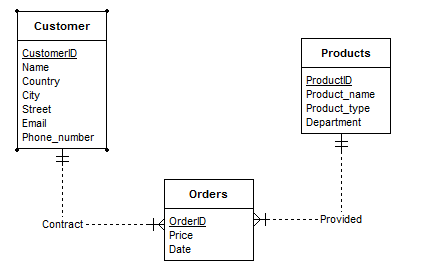

In [7]:
from IPython.display import Image
Image(filename='C:\Users\stefan\Google Drive OldZZZ\Coursera\Data Science\Apprenticeship projects\TaxAssured1.png')

## Table querying

From these three tables, analyst will create two new tables according to his needs.
1. Table with customer name, number of transactions and overall amount spent with the company.
2. Table with OrderID, Customer Name and Product type to filter what kind of products is the customer buying and what kind of services is he missing, meaning he never bought from the company.

**First SQL query:**

SELECT Customer.CustomerID, Customer.Name, Customer.City, Customer.Email, Customer.Phone_number, SUM(Orders.Price) AS Total_amount_spent, COUNT(Customer.Customer_ID) AS Number_of_contracts, AVG(Orders.Price) AS Average_amount_spent

FROM Orders

INNER JOIN Customer

ON Customer.CustomerID = Orders.CustomerID

GROUP BY CustomerID

ORDER BY Total_Amount_Spent DESC;


**Second SQL query:**

SELECT Orders.OrderID, Orders.Price, Customer.Name, Products.Type, Orders.Date

FROM Orders

INNER JOIN Customer

ON Customer.CustomerID = Orders.CustomerID

INNER JOIN Products

ON Orders.ProductID = Products.ProductID

ORDER BY Date DESC;



I save both queries as csv file and load them separately.

**Notice:**

For the sake of using examples in this case study, I will use either tables I created myself in excel or tables generated with random details because there was no actual database in the first place.

# Loading and modifying csv files as tables

In [8]:
import pandas as pd # pandas is a great library for working with dataframes

In [12]:
customers = pd.read_csv('C:\Users\stefan\Google Drive OldZZZ\Coursera\Data Science\Apprenticeship projects\Query1.csv')
customers # These are the company's 7 most spending customers

,CustomerID,Name,City,Email,Phone_number,Total_amount_spent,Number_of_contracts,Average_amount_spent
0,C005678,Arza,Brno,azra@azra.com,777999000,6789000,22,308590.9091
1,C009385,Eriza,Praha,eriza@eriza.com,777666767,5789000,30,192966.6667
2,C002356,Syrza,Praha,syrza@syrza.cz,777555454,5644000,45,125422.2222
3,C007673,Dango,Ostrava,dango@dango.cz,777889009,5222000,20,261100.0000
4,C002233,Mugen,Olomous,mugen@mugen.com,777565787,5110000,18,283888.8889
5,C012289,Intex,Praha,intex@intex.com,776655443,4900000,40,122500.0000
6,C011309,Smear,Praha,smear@smear.com,778899009,4890000,22,222272.7273


In [14]:
contracts = pd.read_csv('C:\Users\stefan\Google Drive OldZZZ\Coursera\Data Science\Apprenticeship projects\Query2.csv')
contracts #The 7 most recent contracts

,OrderID,Price,Name,Type,Date
0,O003578,35000,Azra,Loan,13.11.2015
1,O023443,34000,Smear,Overdraft,12.11.2015
2,O021231,29000,Drone,Cards,12.11.2015
3,O038870,44000,Rondo,Loan,11.11.2015
4,O003456,24000,Edra,Cards,10.11.2015
5,O032233,44000,Assist,Loan,10.11.2015
6,O039009,19000,Lane,Remarketing,10.11.2015


I created a dataframe from the csv files and I can further manipulate it according to my needs - I can add columns, remove rows or iterate over specific columns and rows in python environment.

#### Adding new columns to the second data frame

In [17]:
modified_contracts = contracts
modified_contracts['Loan'] = 0
modified_contracts['Overdraft'] = 0
modified_contracts['Cards'] = 0
modified_contracts['Remarketing'] = 0
modified_contracts # This creates additional columns with default value of 0.

,OrderID,Price,Name,Type,Date,Loan,Overdraft,Cards,Remarketing
0,O003578,35000,Azra,Loan,13.11.2015,0,0,0,0
1,O023443,34000,Smear,Overdraft,12.11.2015,0,0,0,0
2,O021231,29000,Drone,Cards,12.11.2015,0,0,0,0
3,O038870,44000,Rondo,Loan,11.11.2015,0,0,0,0
4,O003456,24000,Edra,Cards,10.11.2015,0,0,0,0
5,O032233,44000,Assist,Loan,10.11.2015,0,0,0,0
6,O039009,19000,Lane,Remarketing,10.11.2015,0,0,0,0


I want to change 0 for 1 in the new columns when the Order as of the specific type, eg. Loan will be 1 in the first column and 0 in other columns, etc.

In [23]:
modified_contracts['Type'][1]

'Overdraft'

In [33]:
product_type = modified_contracts['Type'][row]
modified_contracts[product_type][1]

0

In [35]:
for row in range(len(modified_contracts)):
    product_type = modified_contracts['Type'][row]
    modified_contracts[product_type][row] = 1
    
modified_contracts 
# This adds number 1 to the correct type of product and leaves 0 elsewhere.
# This way I would correctly be able to mark every contract as 1 or 0.

C:\Users\stefan\AppData\Local\Dato\Dato Launcher\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,OrderID,Price,Name,Type,Date,Loan,Overdraft,Cards,Remarketing
0,O003578,35000,Azra,Loan,13.11.2015,1,0,0,0
1,O023443,34000,Smear,Overdraft,12.11.2015,0,1,0,0
2,O021231,29000,Drone,Cards,12.11.2015,0,0,1,0
3,O038870,44000,Rondo,Loan,11.11.2015,1,0,0,0
4,O003456,24000,Edra,Cards,10.11.2015,0,0,1,0
5,O032233,44000,Assist,Loan,10.11.2015,1,0,0,0
6,O039009,19000,Lane,Remarketing,10.11.2015,0,0,0,1


Why did I take such lengths to add 1 or 0 to new columns?

The reason is simple. I want to see what customers did undertake what contracts with us in order to see whether a customer is eligible for a campaign and can be added to the final list of targeted group.

## Estimating mean profit of a campaing

The analyst asked an economist for help in estimating unit cost as well as mean profit for a customer (group of customers) in a given campaign. They came up with qualified estimate based on similar data from previous campaigns.

Furthermore, estimating Unit Cost wasn't so difficult, because the cost of materials and channels used as well as salary of employees is known with good accuracy beforehand.

## Extending dataframes with new variables

In [36]:
Campaigns = ['C1_VIP', 'C2_Loans', 'C3_Cards', 'C4_Remarketing', 'C5_Gifts', 'C6_WebAd']

There is a quite a leap in this step, but it has good reason behind it. I created a new data frame of size 1600x30. Let's assume it is built on the previous two tables and contains the required data for our analysis.

**What are the data?**

The final table contains Name of company/customer, **price** of each contract and counts of contracts. It has **Unit Cost and Mean profit** for every customer/campaign and **eligibility** of a customer for a campain. It also contains **ROI**. Some values are not calculated yet.

In [51]:
extended = pd.read_csv('C:\Users\stefan\Google Drive OldZZZ\Coursera\Data Science\Apprenticeship projects\ExtendedTable.csv')
extended

,Name,Price,Loan,Cards,Overdraft,Remarketing,C1_UC,C2_UC,C3_UC,C4_UC,...,C3_Mean_profit,C4_Mean_profit,C5_Mean_profit,C6_Mean_profit,C1_ROI,C2_ROI,C3_ROI,C4_ROI,C5_ROI,C6_ROI
0,Abader,55000,1,0,0,0,3000,500,350,250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Labdar,33000,0,1,0,0,3000,500,350,250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mandor,21000,0,0,1,0,3000,500,350,250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Lendor,14000,0,0,0,1,3000,500,350,250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fera,13000,0,0,0,1,3000,500,350,250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Sing,27000,0,0,1,0,3000,500,350,250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Lostia,30000,0,1,0,0,3000,500,350,250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Quens,45000,1,0,0,0,3000,500,350,250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Latka,11000,0,0,0,1,3000,500,350,250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Valdez,16000,0,1,0,0,3000,500,350,250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
print extended.columns.values.tolist() # Taking a look at the column names

['Name', 'Price', 'Loan', 'Cards', 'Overdraft', 'Remarketing', 'C1_UC', 'C2_UC', 'C3_UC', 'C4_UC', 'C5_UC', 'C6_UC', 'C1_Elig', 'C2_Elig', 'C3_Elig', 'C4_Elig', 'C5_Elig', 'C6_Elig', 'C1_Mean_profit', 'C2_Mean_profit', 'C3_Mean_profit', 'C4_Mean_profit', 'C5_Mean_profit', 'C6_Mean_profit', 'C1_ROI', 'C2_ROI', 'C3_ROI', 'C4_ROI', 'C5_ROI', 'C6_ROI']


### Removing empty rows

We can see there are some NaN rows, so we can delete them. If the name is NaN I remove it:

In [52]:
extended_campaign = extended[extended.Name.notnull()]
extended_campaign.tail() # It's now correct

,Name,Price,Loan,Cards,Overdraft,Remarketing,C1_UC,C2_UC,C3_UC,C4_UC,...,C3_Mean_profit,C4_Mean_profit,C5_Mean_profit,C6_Mean_profit,C1_ROI,C2_ROI,C3_ROI,C4_ROI,C5_ROI,C6_ROI
1595,Ramga,13000,0,0,0,1,3000,500,350,250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1596,Enterea,27000,0,0,1,0,3000,500,350,250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1597,Rybada,30000,0,1,0,0,3000,500,350,250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1598,Ramga,45000,1,0,0,0,3000,500,350,250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1599,Rybada,11000,0,0,0,1,3000,500,350,250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
grouped = extended_campaign.groupby(['Name']).sum()
grouped_price = grouped
grouped_price_sorted = grouped_price.sort(['Price'], ascending=[0]).reset_index()
grouped_price_sorted

,Name,Price,Loan,Cards,Overdraft,Remarketing,C1_UC,C2_UC,C3_UC,C4_UC,C5_UC,C6_UC,C1_Elig,C2_Elig,C3_Elig,C4_Elig,C5_Elig,C6_Elig,C1_Mean_profit,C2_Mean_profit,C3_Mean_profit,C4_Mean_profit,C5_Mean_profit,C6_Mean_profit,C1_ROI,C2_ROI,C3_ROI,C4_ROI,C5_ROI,C6_ROI
0,Mandor,1323000,15,6,13,18,156000,26000,18200,13000,10400,3120,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kinga,1289000,11,8,12,20,153000,25500,17850,12750,10200,3060,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Labdar,1244000,9,11,12,20,156000,26000,18200,13000,10400,3120,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abader,1221000,8,12,17,15,156000,26000,18200,13000,10400,3120,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Baltara,1190000,10,10,14,17,153000,25500,17850,12750,10200,3060,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Ramga,1026000,8,10,9,13,120000,20000,14000,10000,8000,2400,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Rybada,970000,8,11,10,12,123000,20500,14350,10250,8200,2460,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Enterea,937000,8,2,14,15,117000,19500,13650,9750,7800,2340,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Lampe,873000,9,4,10,9,96000,16000,11200,8000,6400,1920,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Sing,868000,9,4,9,10,96000,16000,11200,8000,6400,1920,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This table shows total amount spent by each customer (ordered from highest to lowest) in our company during the existence of our database.

We can easily repair the sum in columns where we didn't want it:

In [89]:
grouped_price_sorted['C1_UC'] = 3000
grouped_price_sorted['C2_UC'] = 500
grouped_price_sorted['C3_UC'] = 350
grouped_price_sorted['C4_UC'] = 250
grouped_price_sorted['C5_UC'] = 200
grouped_price_sorted['C6_UC'] = 60

### Adding eligibility number

In [90]:
pd.set_option('display.max_columns', None)
grouped_price_sorted.head()

,Name,Price,Loan,Cards,Overdraft,Remarketing,C1_UC,C2_UC,C3_UC,C4_UC,C5_UC,C6_UC,C1_Elig,C2_Elig,C3_Elig,C4_Elig,C5_Elig,C6_Elig,C1_Mean_profit,C2_Mean_profit,C3_Mean_profit,C4_Mean_profit,C5_Mean_profit,C6_Mean_profit,C1_ROI,C2_ROI,C3_ROI,C4_ROI,C5_ROI,C6_ROI
0,Mandor,1323000,15,6,13,18,3000,500,350,250,200,60,1,0,0,0,0,0,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kinga,1289000,11,8,12,20,3000,500,350,250,200,60,1,0,0,0,0,0,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Labdar,1244000,9,11,12,20,3000,500,350,250,200,60,1,0,0,0,0,0,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abader,1221000,8,12,17,15,3000,500,350,250,200,60,1,0,0,0,0,0,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Baltara,1190000,10,10,14,17,3000,500,350,250,200,60,1,0,0,0,0,0,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that eligibility number is still 0 in every column. But we now know that first 15 customers ordered by total amount spent in our company are eligible for the first VIP campaign.

We also calculated mean profit of this campaign to be 10 000 for customers that has spend more than one million with the company and 5000 that has spend less.

In [93]:
for row in range(len(grouped_price_sorted)):
    if grouped_price_sorted['Price'][row] > 1000000:
        grouped_price_sorted['C1_Mean_profit'][row] = 10000
    else:
        grouped_price_sorted['C1_Mean_profit'][row] = 5000
        
for row in range(len(grouped_price_sorted)): # This sets eligibility for campaign 1
    if row < 15:
        grouped_price_sorted['C1_Elig'][row] = 1
    else:
        grouped_price_sorted['C1_Elig'][row] = 0
        
for row in range(len(grouped_price_sorted)): # This calculates ROI for the campaign
    grouped_price_sorted['C1_ROI'][row] = (grouped_price_sorted['C1_Mean_profit'][row]/grouped_price_sorted['C1_UC'][row])-1

C:\Users\stefan\AppData\Local\Dato\Dato Launcher\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\stefan\AppData\Local\Dato\Dato Launcher\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\stefan\AppData\Local\Dato\Dato Launcher\lib\site-packages\IPython\kernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\stefan\AppData\Loc

In [94]:
grouped_price_sorted.head()

,Name,Price,Loan,Cards,Overdraft,Remarketing,C1_UC,C2_UC,C3_UC,C4_UC,C5_UC,C6_UC,C1_Elig,C2_Elig,C3_Elig,C4_Elig,C5_Elig,C6_Elig,C1_Mean_profit,C2_Mean_profit,C3_Mean_profit,C4_Mean_profit,C5_Mean_profit,C6_Mean_profit,C1_ROI,C2_ROI,C3_ROI,C4_ROI,C5_ROI,C6_ROI
0,Mandor,1323000,15,6,13,18,3000,500,350,250,200,60,1,0,0,0,0,0,10000,NaN,NaN,NaN,NaN,NaN,2.333333,NaN,NaN,NaN,NaN,NaN
1,Kinga,1289000,11,8,12,20,3000,500,350,250,200,60,1,0,0,0,0,0,10000,NaN,NaN,NaN,NaN,NaN,2.333333,NaN,NaN,NaN,NaN,NaN
2,Labdar,1244000,9,11,12,20,3000,500,350,250,200,60,1,0,0,0,0,0,10000,NaN,NaN,NaN,NaN,NaN,2.333333,NaN,NaN,NaN,NaN,NaN
3,Abader,1221000,8,12,17,15,3000,500,350,250,200,60,1,0,0,0,0,0,10000,NaN,NaN,NaN,NaN,NaN,2.333333,NaN,NaN,NaN,NaN,NaN
4,Baltara,1190000,10,10,14,17,3000,500,350,250,200,60,1,0,0,0,0,0,10000,NaN,NaN,NaN,NaN,NaN,2.333333,NaN,NaN,NaN,NaN,NaN


In [95]:
grouped_price_sorted.tail()

,Name,Price,Loan,Cards,Overdraft,Remarketing,C1_UC,C2_UC,C3_UC,C4_UC,C5_UC,C6_UC,C1_Elig,C2_Elig,C3_Elig,C4_Elig,C5_Elig,C6_Elig,C1_Mean_profit,C2_Mean_profit,C3_Mean_profit,C4_Mean_profit,C5_Mean_profit,C6_Mean_profit,C1_ROI,C2_ROI,C3_ROI,C4_ROI,C5_ROI,C6_ROI
55,Latka,344000,0,4,7,5,3000,500,350,250,200,60,0,0,0,0,0,0,5000,NaN,NaN,NaN,NaN,NaN,0.666667,NaN,NaN,NaN,NaN,NaN
56,Evlyt,337000,1,3,6,6,3000,500,350,250,200,60,0,0,0,0,0,0,5000,NaN,NaN,NaN,NaN,NaN,0.666667,NaN,NaN,NaN,NaN,NaN
57,Allst,324000,3,2,4,7,3000,500,350,250,200,60,0,0,0,0,0,0,5000,NaN,NaN,NaN,NaN,NaN,0.666667,NaN,NaN,NaN,NaN,NaN
58,Mundum,320000,2,2,4,8,3000,500,350,250,200,60,0,0,0,0,0,0,5000,NaN,NaN,NaN,NaN,NaN,0.666667,NaN,NaN,NaN,NaN,NaN
59,Angor,292000,1,2,3,10,3000,500,350,250,200,60,0,0,0,0,0,0,5000,NaN,NaN,NaN,NaN,NaN,0.666667,NaN,NaN,NaN,NaN,NaN


We can see, that eligibility and mean_profit are set correctly according to our criteria. ROI is calculated as (Mean_profit/unit_cost) - 1.

## Comparing profitability across different campaigns

The analyst wants to compare every campaign acros each other and therefore needs a uniform metric.

The metric he chose for this comparison is ROI (return of investment) calculated as (Mean profit/Unit cost) - 1.
If the result is positive, the result is profit, if the result is negative, the result is loss.

## Rationale behind the constraints

Even though the most profitable solution could be to just launch one campaign aimed at the richest of our customers, to increase our profits. But as we stated in the beginning of this case study, it is not the company's most important goal. In the first place, the company wants to increase it's market share, but to do it in the most profitable way. That is why the company wants to launch many different campaigns and combine them in an efficient way.

#### Explaining the rationale

The company wants to use it's current resources in the form of employees first and only then hire new people if needed.

Minimum constraint means using the current capacity of the company.
Maximum constraint means allocating employees from different departments or hiring new people up to the amount of maximum number of customers addressed.

### Two main constraints

Above mentioned constraints are considered minor. The two major constraints are:

1. Total budget allocated for all the campaigns combined. It cannot be increased sooner than 3 months after the campaigns have been launched and reported to be profitable.
2. Minimal ROI of 0.5%. Any campaign that decreases it's ROI under 0.5% is stopped even if other constraints aren't fulfilled. 
    

## Static optimization

Let's make a leap again and suppose we did similar transformations as above, to set eligibility of every campaign and customer to 1 and 0, we calculated ROI of every campaign based on estimated mean profit and unit cost. Our real table would have much more rows, much more customers and the spread of data would be much more disperse. What I present here is for the sake of exercise.

## How to optimize:

Let's turn back to our constraints. As I wrote above, the company is constrained mostly by a budget and ROI. If ROI is lower than 0.5%, the company doesn't continue with it's campaign. If the company spends all the money from budget, the campaigning stops as well, even if ROI was well above 0.5%. The campaigns stop whichever condition is met.

In code, the condition would look like this:

In [100]:
def main_contraint():
    customers = []
    while Budget > 0 or ROI > 0.005:
        customers.append(customer) # here would be specified the condition

There is second kind of constraint: minimal and maximal. Fulfilling these constraints would go in 2 phases.
In the first phase, every minimal constraint for campaign, channel and product would be fulfilled in this fashion:
Sort all customer/campaign pairs in a table (much bigger table than the grouped_price_sorted table, but similar style) by their calculated ROI.
The table would have to contain information about the channel and product of the specific campaign.

**Steps:**

1. Set channel, campaign, product to 0 and create an empty list of customers.
2. Start from the highest ROI and add a customer one by one to the empty list of customers.
3. For every added customer, add 1 to the campaign, product and channel he is from.
4. After every customer, check if some minimal constraint has been fulfilled, if not, continue in this manner.
5. If there is some minimal constraint fulfilled, for example channel, stop adding customers from this channel to the list and skip them, add only customers from the unfulfilled constraints.
6. Continue until every minimal constraint is fulfilled.

This procedure assumes two main constraints won't be fulfilled during this minimal constraints filtering.

Let's see how this procedure would look like in code:

In [97]:
# This function is not fully implemented and ready to use
# It should just capture the idea explained above

def create_minimal_constraints_list(name_of_table, budget, c1, c2, p1, p2, h1, h2):
    '''
    This function creates a list of customers for minimal constraints for
    products p1 and p2 and channels h1 and h2. c1 to h2 are numbers that stand for minimal constraints.
    '''
    customers = []
    C1 = 0
    C2 = 0
    P1 = 0
    P2 = 0
    H1 = 0
    H2 = 0
    for customer in range(len(name_of_table)):
        if C1 >= c1 and C2 >= c2 and P1 == p1 and P2 == p2 and H1 == h1 and H2 == h2:
            break # if all the constraints are fulfilled, break and return list of customers
        else:
             budget -= name_of_table['Cost'][customer] # substracts 
            # adding a customer to the list
            if H1 == h1:
                pass
            else:
                if name_of_table['Channel'][customer] == H1:
                    H1 += 1
                    customers.append(name_of_table['Name'][customer])
            if H2 == h1:
                pass
            else:
                if name_of_table['Channel'][customer] == H2:
                    H2 += 1
                    customers.append(name_of_table['Name'][customer])
            if name_of_table['Campaign'][customer] == C1:
                C1 += 1
            elif name_of_table['Campaign'][customer] == C2:
                C2 += 1
            if P1 == p1:
                pass
            else:
                if name_of_table['Product'][customer] == P1:
                    P1 += 1
                    customers.append(name_of_table['Name'][customer])
            if P2 == p2:
                pass
            else:
                if name_of_table['Product'][customer] == P2:
                    P2 += 1
                    customers.append(name_of_table['Name'][customer])
                # This would add duplicate customer names, but I could easily filter it with changing it to set and then back to list
    return (budget, customers, C1, C2, P1, P2, H1, H2)

### Second phase

In the first phase I was fulfillling the minimal constraints and in the second phase I would try to fulfill the maximal constraints in similar fashion with one difference:

I would add a budget and ROI constraint to the filtering process.
Basically, there are three main possibilities when I stop adding customers to the list of definite target group:

1. ROI in the table for all campaigns drops below 0.5% and it is not profitable anymore to invest more money in these campaigns.
2. We run out of budget at some point, in which case we will only address the most profitable customers to use our budget in the most efficient way.
3. We fulfill the maximal constraints of campaigns, which most probably means, that we spent all our human resources (channels) in reaching our customers. Although we have still budget and profitable customers, we don't have enough employees. It would therefore be wise, to hire more people for these tasks.

The code would also look similarly as in the first phase. I would just add the new constraints and substract budget I already spent and customers I already added to the list.

# Dynamic optimization

The previous solution doesn't accout for time variable and is therefore static. It assumes, we can contact each customers only once per campaign, whereas in reality, it is often not the case. We would like to have better policy for contacting customers with our offers repeatedly, after some time. The main question is what time?

We are looking for an optimal contact policy with with respect to company's budget and profits.

####We need to solve these issues with dynamic optimization:

1. We want to find the proper time window for repeatedly contacting the same customers within the same campaign. Our motivation is not to lose money by ignoring our customers and not offering them our services too rarely. 
2. On the other hand, we don't want to contact the same customer within the same campaign too often, because it would be too costly (we have limited budget and resources), the return of investment would decrease and churn rate could possibly also increase (The customers could deem us as spammers and be annoyed by our insistence on selling them something).
3. We want to find the correct distance between different campaigns when contacting customers.
4. The optimization should spread out evenly our Total maximization into months.


###Invaluable gain of accounting time in our optimization:
We get **instant feedback** from our customers in the form of contracts, response rate and churn rate. This assumes, we are collecting data in databases for further analysing. We can then compare our estimates with the real numbers and improve our campaigns accordingly. After 3 to 6 months we should have quite reliable data from this campaigning.

## Implementing these intuitions

We would have to adjust our budget accordingly. For example, if we had 18 million CZK budget for year of campaigning, we would split it by month (because it is peried in which salaries, substantially contributing to the budget, are paid). The mean budget for month would be 1.5M, but it is flexible, as some months won't need to be so expensive, while in the months of starting the campaign, the expenses will be higher.

Here is an example solution of the contact policy:

In [101]:
contact_policy = pd.read_csv('C:\Users\stefan\Google Drive OldZZZ\Coursera\Data Science\Apprenticeship projects\Timetable.csv')
contact_policy

,campaign/channel,Telesales,SMS,Email,Dealers,Bill insert,WebAd
0,Sales,3,999,999,3,999,0
1,Care,2,2,2,6,3,0
2,Retention,4,999,4,2,999,0
3,Inform,2,2,2,3,6,0
4,Image,3,2,2,6,6,0


The numbers are in months, eg. 3 means contact once in 3 months. 999 means not eligible campain - the type of campaign cannot be executed through this channel.

What is important again is, that this solution is based on initial estimates and needs to be monitored during the campaign if the results correspond to estimates. If not, we need to flexibly change our contact policy in order to maxime ROI and possibly decrease churn rate, because we are aiming at increasing our market share in the year 2016.

# Conclusion

In this case study I sketchet a solution to a campaigning problem, starting from database data extraction through data frame transformations leading to campaign static and dynamic optimizations. To implement the solution I used excel, python, sql and er-assistant in this assignment. All the data used is fictional and serves only as an example.